<center>

***
<font size="4">
Artificial Neural Network &nbsp; &nbsp; <br>
for &nbsp; &nbsp; <br>
Predicting Stocks' Price Change &nbsp; &nbsp; <br>
</font>

##### 14 January 2026

##### Juan Ignacio Mendoza Garay

***

</center>

INFORMATION:

Description:\
&nbsp;&nbsp;&nbsp;The artificial neural network is trained with stocks' historical data. Then it predicts if a stock's price at the first day of a week will be higher or lower than the price at the first day of the previous week.

Data dependency:\
&nbsp;&nbsp;&nbsp;A SQLite database with historical data of selected stocks generated with file [Web_Scraping_Data_Nasdaq_Europe.ipynb](Web_Scraping_Data_Nasdaq_Europe.ipynb).

Instructions:\
&nbsp;&nbsp;&nbsp;Edit the values indicated with an arrow like this: <---\
&nbsp;&nbsp;&nbsp;Comment/uncomment or change values as suggested by the comments.\
&nbsp;&nbsp;&nbsp;'Run the program, close your eyes and hope for the best.

***

In [1]:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output

***
### Set paths

In [2]:
data_folder = 'stocks_data'      # <--- directory for files
dataset_name = 'HEL_LargeCap_5Y' # <--- name of the dataset to use

***
### Pre-process data
#### Get historical prices

In [3]:
db_fn = f'{data_folder}/{dataset_name}/{dataset_name}.db'
connection = sqlite3.connect(db_fn)
cursor = connection.cursor()
cursor.execute( f'SELECT * FROM av_prices LIMIT 1' )
stocks_names = ', '.join([f'"{row[0]}"' for row in cursor.description][1:])
print(len(stocks_names),'stocks',end='')
# print(f":\n\n{stocks_names}".replace("\"",""))

586 stocks

>
#### Select time-range and add weeks' index

In [4]:
# start_date = '2023-01-02' # '2023-01-02' is monday
start_date = '2024-01-01' # '2024-01-01' is monday
end_date = '2026-01-04' # '2026-01-04' is sunday of the first week

query = f"""
            SELECT
                Date,
                STRFTIME('%W', Date) i_week,
                {stocks_names}
            FROM av_prices
            WHERE
                Date > DATE("{start_date}")
                AND
                Date < DATE("{end_date}")
            ORDER BY Date ASC
        """
weeks_df = pd.read_sql_query(query, connection)
weeks_df.i_week = weeks_df.i_week.astype(int)
weeks_df

,Date,i_week,Elisa Oyj,Fiskars Oyj Abp,Fortum Oyj,Hiab Oyj,Huhtamäki Oyj,Kalmar Oyj B,Kemira Oyj,Kesko Oyj A,...,SSAB B,Stora Enso Oyj A,Stora Enso Oyj R,Telia Company,Terveystalo Oyj,TietoEVRY Oyj,UPM-Kymmene Oyj,Vaisala Oyj A,Valmet Oyj,Wärtsilä Oyj Abp
0,2024-01-02,1,42.1089,17.8757,13.2552,50.3919,36.4459,NaN,16.6570,18.2279,...,6.9786,12.6666,12.7086,2.3657,7.8928,21.6121,34.3668,38.6735,26.2818,13.0637
1,2024-01-03,1,42.0580,17.8410,13.2068,49.1342,36.2139,NaN,16.3999,18.1539,...,6.8331,12.5124,12.5392,2.3646,7.8255,21.0784,34.1104,38.2306,25.2876,12.6488
2,2024-01-04,1,42.4018,17.8883,13.6413,49.2738,37.2393,NaN,16.5669,18.3406,...,6.7920,12.6437,12.6990,2.3926,7.8380,21.2653,34.4546,38.0042,25.3467,12.9001
3,2024-01-05,1,42.7347,18.0734,13.9064,48.8393,36.8622,NaN,16.4029,18.2475,...,6.7488,12.5166,12.6193,2.3960,7.9348,21.2720,34.6856,37.7730,24.8423,12.9739
4,2024-01-08,2,42.4519,18.1386,13.9843,49.6141,36.9631,NaN,16.5733,18.4641,...,6.6251,12.6459,12.7193,2.4036,7.9327,21.3131,35.0953,37.5402,25.0603,13.1382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,2025-12-22,51,36.8783,12.2935,17.9572,48.1139,28.9325,39.5792,19.2555,18.7943,...,6.3086,10.3094,10.2974,3.5354,9.4093,18.1303,24.0156,43.7872,27.2459,30.1833
498,2025-12-23,51,37.0979,12.2955,18.0406,48.3166,29.0634,39.7459,19.3171,18.8331,...,6.3054,10.3361,10.3185,3.5978,9.6256,18.0296,24.0798,43.8261,27.4825,30.3069
499,2025-12-29,52,37.4276,12.4465,18.0816,48.9892,29.3964,40.0315,19.4441,18.9138,...,6.3779,10.5113,10.5637,3.6118,9.6434,18.1438,24.6155,43.9231,27.8280,30.1562
500,2025-12-30,52,37.6754,12.6215,18.1592,49.4783,29.7435,40.4732,19.5667,19.2033,...,6.4447,10.6550,10.6952,3.6404,9.7414,18.2935,24.8085,44.0771,28.3180,30.3801


>
#### Remove or complete stocks with incomplete data
Incomplete data is linearly interpolated if the number of maximum continuous missing observations is less or equal than a threshold, otherwise the whole stock is removed.

In [5]:
cnull_thresh = 5 # <--- maximum continuous missing observations to interpolate, otherwise delete
verbose = False  # <---

n_all = len(weeks_df.columns[2:])
c_int = 0
for col in weeks_df.columns[2:]:
    isnull_int = weeks_df.loc[:,col].isnull().astype(int)
    max_cont_null = isnull_int.groupby(weeks_df.loc[:,col].notnull().astype(int).cumsum()).sum().max()
    if max_cont_null:
        if max_cont_null <= cnull_thresh:
            weeks_df.loc[:,col] = weeks_df.loc[:,col].interpolate()
            nan_cond = 'interpolated'
            c_int += 1
        else:
            nan_cond = 'missing'
        if verbose: print(f'   {sum(isnull_int)} {nan_cond} data points for stock "{col}"')
weeks_df = weeks_df.dropna(axis=1)
n_rem = weeks_df.shape[1] - 2
print(f'{c_int} interpolated, {n_all - n_rem} deleted; {n_rem} remaining stocks:\n')
print(', '.join([s for s in weeks_df.columns[2:]]))

0 interpolated, 1 deleted; 36 remaining stocks:

Elisa Oyj, Fiskars Oyj Abp, Fortum Oyj, Hiab Oyj, Huhtamäki Oyj, Kemira Oyj, Kesko Oyj A, Kesko Oyj B, Kojamo Oyj, KONE Oyj, Konecranes Oyj, Mandatum, Metso Oyj, Metsä Board Oyj A, Metsä Board Oyj B, Neste Oyj, Nokia Oyj, Nokian Renkaat Oyj, Nordea Bank Abp, Orion Oyj A, Orion Oyj B, Outokumpu Oyj, Qt Group Oyj, Sampo Oyj A, Sanoma Oyj, SSAB A, SSAB B, Stora Enso Oyj A, Stora Enso Oyj R, Telia Company, Terveystalo Oyj, TietoEVRY Oyj, UPM-Kymmene Oyj, Vaisala Oyj A, Valmet Oyj, Wärtsilä Oyj Abp


>
#### Rescale data

In [6]:
do_rescale = False # <---

if do_rescale:
    for col in weeks_df.columns[2:]:
        weeks_df.loc[:,col] = weeks_df.loc[:,col] - weeks_df.loc[:,col].min()
        weeks_df.loc[:,col] /= weeks_df.loc[:,col].max()
    print('data has been rescaled')
else:
    print('data was not rescaled')

data was not rescaled


>
#### Variables and format

The input to the neural network is a matrix where rows are observations. Each row is a vector of features  (independent variables) composed by concatenated values for all stocks, for the same week. Only full weeks (5 days) are included. Each feature is the input to each input neuron.

The outcomes (dependent variables) are arranged in a vector, where each element corresponds to an observation (row of the input matrix). The values indicate whether the first day of the following week (even if it has less than 3 days) the price is higher (1) or lower (0) than the first day of the observation week, for the target stock.

The number of observations is the number of full weeks in the observed time range.

In [7]:
tgt_stock = 0 # <--- Name or index of the target stock

all_data = [] # the penultimate element of a row is the week index, the last element is the outcome
i_start = 0
if isinstance(tgt_stock,str): tgt_stock_name = tgt_stock
else: tgt_stock_name = list(weeks_df.columns[2:])[tgt_stock]
while i_start < (weeks_df.shape[0]-4):
    i_end = i_start + 4
    if (weeks_df.i_week[i_start] == weeks_df.i_week[i_start:i_end]).all(): # check full-week
        this_week = weeks_df.loc[i_start:i_end, weeks_df.columns[2:]]
        this_row = this_week.to_numpy().flatten()
        this_outcome = int(weeks_df.loc[i_end, tgt_stock_name] > this_week[tgt_stock_name].iloc[0])
        all_data.append( np.append(this_row,[weeks_df.i_week[i_start], this_outcome]) )
        i_start = i_end
    else:
        i_start += 1
all_data = np.array(all_data)
print('stock to predict:',tgt_stock_name)
print('all data (rows, columns):',all_data.shape)

stock to predict: Elisa Oyj
all data (rows, columns): (101, 182)


>
#### Split data for training and testing

In [8]:
f_train = 0.9 # <--- proportion of training observations (the rest are for testing)
shuffle = 1   # <--- seed for shuffling the train/test split

rng_shuf = np.random.default_rng(seed=shuffle)
all_data_shuf = rng_shuf.choice(all_data, size=len(all_data), replace=False)
n_train = int(len(all_data)*f_train)

data_train = all_data_shuf[:n_train]
data_test = all_data_shuf[n_train:]
print('training data (rows, columns):',data_train.shape)
print('testing data (rows, columns):',data_test.shape)

training data (rows, columns): (90, 182)
testing data (rows, columns): (11, 182)


***
### Functions

In [9]:
def init_weights(n_in, n_out, seed=0):
    '''He initialisation (preferred for ReLU activations)'''
    rng = np.random.default_rng(seed=seed)
    return  rng.normal(size=(n_in,n_out)) * np.sqrt(2 / n_in)

def relu(z, alpha=0, deriv=False):
    ''' alpha controls leak'''
    z = z.copy()
    if deriv:
        z[z > 0] = 1
        z[z <= 0] = alpha
    else:
        z[z <= 0] = z[z < 0] * alpha
    return z

def sigmoid(z, deriv=False):
    a = np.exp(-z)
    if deriv: return a / (1 + a)**2
    else: return 1 / (1 + a)

def binXentropy(pred, truth):
    return -np.mean( truth * np.log(pred) + (1 - truth) * np.log(1 - pred) )

def feed_forward(layers, weights, biases, alpha=0):

    h1_in = np.dot(layers['input'], weights['w0']) + biases['b0'] # first layer plus bias
    layers['h1_out'] = relu(h1_in, alpha=alpha)

    h2_in = np.dot(layers['h1_out'], weights['w1']) + biases['b1'] # second layer plus bias
    layers['h2_out'] = relu(h2_in, alpha=alpha)

    out_in = np.dot(layers['h2_out'], weights['w2']) + biases['b2'] # output layer plus bias
    layers['out'] = sigmoid(out_in)

    return layers, weights, biases

***
### Training

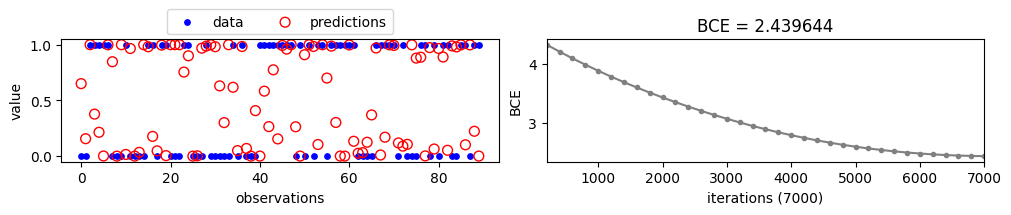

In [10]:
n_nodes_1 = 64            # <--- number of neurons in the first hidden layer
n_nodes_2 = 16            # <--- number of neurons in the second hidden layer
alpha = 0.3               # <--- ReLU leak
n_iterations = 7000       # <--- number of iterations for training
plot_step = 200           # <--- number of iterations between each plot
learning_rate = 1/10**10  # <--- learning rate

X_train = data_train[:,:-1] # features (independent variables)
y_train = np.expand_dims(data_train[:,-1],1) # outcomes (dependent variable)

# ..................................................................................................
# Initialise weights and biases:

weights = {}
biases = {}

weights['w0'] = init_weights(X_train.shape[1], n_nodes_1)
biases['b0'] = np.zeros(n_nodes_1)

weights['w1'] = init_weights(n_nodes_1 ,n_nodes_2)
biases['b1'] = np.zeros(n_nodes_2)

weights['w2'] = init_weights(n_nodes_2,1)
biases['b2'] = np.zeros(1)

# ..................................................................................................

layers_train = {'input':X_train}
bce_all = []
rmse_all = []
plot_idx = []
y_linspc = list(range(len(y_train)))
y_max_ = np.sort(y_train)[-2]
for i in range(1,n_iterations + 1):

    # ..............................................................................................
    # feed forward:

    layers_train, weights, biases = feed_forward(layers_train, weights, biases, alpha=alpha)
    if np.isnan(layers_train['out'][0]) or (abs(layers_train['out'][0]) == np.inf):
        raise Exception('Exploded at i =',i)

    # ..............................................................................................
    # back propagation:

    d_error = binXentropy(layers_train['out'], y_train)
    d_out = d_error * sigmoid(layers_train['out'], deriv=True)

    weights['w2'] -= np.dot(layers_train['h2_out'].T, d_out) * learning_rate
    biases['b2'] -= np.sum(d_out, axis=0) * learning_rate
    d_2 = np.dot(d_out, weights['w2'].T) * relu(layers_train['h2_out'], deriv=True)

    weights['w1'] -= np.dot(layers_train['h1_out'].T, d_2) * learning_rate
    biases['b1'] -= np.mean(d_2, axis=0) * learning_rate
    d_1 = np.dot(d_2, weights['w1'].T) * relu(layers_train['h1_out'], deriv=True)

    weights['w0'] -= np.dot(layers_train['input'].T, d_1) * learning_rate
    biases['b0'] -= np.mean(d_1, axis=0) * learning_rate

    # ..............................................................................................
    # visualisation:

    if (i % plot_step == 0) or (i == n_iterations):

        plot_idx.append(i)
        bce_all.append(d_error)
        rmse = (np.mean((layers_train['out'] - y_train)**2))**0.5
        rmse_all.append(rmse)

        clear_output(wait=True)
        plt.rcParams['figure.constrained_layout.use'] = True
        plt.figure(figsize=(10,2))

        plt.subplot(1,2,1)
        plt.scatter(y_linspc, y_train, 15, color='blue')
        plt.scatter(y_linspc, layers_train['out'], 50, marker='o',facecolors='none',edgecolors='red')
        plt.legend( ['data','predictions'],
                    ncols=2, loc='upper center', bbox_to_anchor=(0.5,1.3))
        plt.ylabel('value')
        plt.xlabel('observations');

        plt.subplot(1,2,2)
        plt.plot(plot_idx, bce_all, '.-', color='gray')
        plt.xlim(plot_step,n_iterations)
        plt.ylabel('BCE')
        plt.xlabel(f'iterations ({i})')
        plt.title(f'BCE = {round(d_error,6)}')

        plt.show()

***
### Testing

In [11]:
X_test = data_test[:,:-1]
y_test = data_test[:,-1]

out_test = []
for x, y in zip(X_test,y_test):
    layers_test, _, _ = feed_forward({'input':x}, weights, biases)
    out_test.append(layers_test['out'][0])
out_test = np.array(out_test)

print('TESTING:')
print(f'  data = {y_test}'.replace('\n',''))
print(f'  pred = {np.round(out_test,2)}'.replace('\n',''))
print(f'   BCE = {binXentropy(out_test, y_test)}')

TESTING:
  data = [0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
  pred = [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
   BCE = 6.938635508840512


In [12]:
connection.close()